# Metryki regresji

Testy metod ewaluacji regresji oprzemy na przebiegu sinusoidalnym, zaburzonym przy użyciu wartości losowych.

In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [25]:
rnd = RandomState(25)
x = np.linspace(0, 2*np.pi, 101)
y_true = 10 * np.sin(x)
y_pred = y_true + rnd.normal(scale=1, size=101).cumsum()

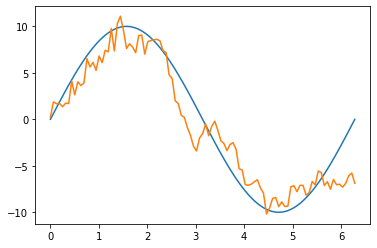

In [26]:
fig, ax = plt.subplots()
ax.plot(x, y_true)
ax.plot(x, y_pred)

## Mean Squared Error

Uwypukla wyraźnie błędne predykcje - przez co jeden outlier może całkowicie zaburzyć ocenę.

In [41]:
def mse(truth, prediction):
    return (np.square(truth - prediction)).mean(axis=0)

In [42]:
mse(y_true, y_pred)

5.158676972641266

Co się stanie dla outliera?

In [34]:
y_outl = y_pred.copy()
y_outl[14] += 10
y_outl[80] -= 20

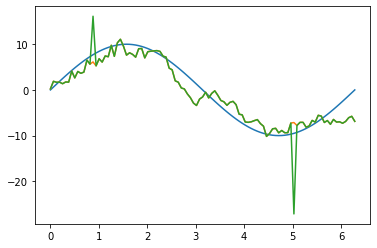

In [35]:
fig, ax = plt.subplots()
ax.plot(x, y_true)
ax.plot(x, y_pred)
ax.plot(x, y_outl)

In [36]:
mse(y_true, y_outl)

8.858592507039928

## Mean Absolute Error

Nie karze tak silnie za duże błędy - dobra dla danych z obserwacjami odstającymi.

In [43]:
def mae(truth, prediction):
    return (np.abs(truth - prediction)).mean(axis=0)

In [44]:
mae(y_true, y_pred)

1.8161470234828574

In [45]:
mae(y_true, y_outl)

2.0350057068813117

## R2 score

Umożliwia porównanie predykcji z *baselinem* - zwróceniem średnich wartości.

In [48]:
def r2(truth, prediction):
    return 1 - mse(
        truth, prediction) / mse(
        truth, np.full_like(prediction, truth.mean(axis=0)))

In [49]:
r2(y_true, y_pred)

0.8957947251526465

In [50]:
r2(y_true, y_outl)

0.8210564313577935

# Metryki klasyfikacji

Aby poznać popularne metody oceny klasyfikatorów wygenerujemy sobie przykładowe sekwencje klas przykładów. Wykorzystamy w tym celu bibliotekę numpy oraz generator liczb losowych z rozkładu normalnego.

In [1]:
import numpy as np

In [2]:
from numpy.random import RandomState

In [5]:
random = RandomState(13)

random_1 = random.normal(loc=0.0, size=100)
random_2 = random.normal(loc=0.5, size=100)
y_test = [1 if i >= 0 else 0 for i in random_1]
y_pred = [1 if i >= 0 else 0 for i in random_2]
print(y_test[:10])
print(y_pred[:10])

[0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 0, 1, 0, 1]


## Macierz błędów

Pierwszym krokiem będzie stworzenie macierzy błędów, czyli wyznaczenia true postives, true negatives, false positives i false negatives.

In [6]:
def confusion_matrix(truth, prediction):
    tp, tn, fp, fn = 0, 0, 0, 0
    for label, predicted in zip(truth, prediction):
        if label == predicted:
            if predicted:
                tp += 1
            else:
                tn += 1
        else:
            if predicted:
                fp += 1
            else:
                fn += 1
    return tp, tn, fp, fn

In [7]:
# zastosowanie dla 
confusion_matrix(y_test, y_pred)

(33, 21, 30, 16)

## Accuracy

Pierwszą miarą jest miara dokładności 

In [8]:
def accuracy(truth, prediction):
    tp, tn, fp, fn = confusion_matrix(truth, prediction)
    return (tp + tn) / (tp + tn + fp + fn)

Wynik dla analizowanych predykcji

In [9]:
accuracy(y_test, y_pred)

0.54

Z accuracy związany jest problem - zachowuje się źle przy niezbalansowanych zbiorach. Wygenerujemy zbiór, w którym większość przykładów będzie pozytywna.

In [10]:
# żeby większość była 1
random = RandomState(13)

random_3 = random.normal(loc=-1, scale=0.5, size=100)
y_extr = [1 if i >= 0 else 0 for i in random_3]
sum(y_extr)

3

Nasz "klasyfikator" ma stosunkowo niską dokładność.

In [11]:
accuracy(y_extr, y_pred)

0.38

Zakładając z góry, że wszystkie przykłady są pozytywne uzyskujemy bardzo wysoką dokładność. Takie zachowanie jest w wielu przypadkach niepożądane - przypuśćmy, że próbujemy stworzyć klasyfikator do komórek rakowych, gdzie większość przypadków jest negatywna - dla takiego podejścia, zwrócenie informacji że wszystkie przypadki są negatywne da bardzo wysoką dokładność.

In [12]:
accuracy(y_extr, 100 * [0])

0.97

## Recall

Ta miara z kolei mówi o tym, jaką część dodatnich wyników wykrył klasyfikator

In [13]:
def recall(truth, prediction):
    tp, tn, fp, fn = confusion_matrix(truth, prediction)
    return tp /(tp + fn)

In [14]:
recall(y_test, y_pred)

0.673469387755102

In [15]:
recall(y_extr, y_pred)

0.6666666666666666

In [16]:
recall(y_extr, 100 * [0])

0.0

In [17]:
recall(y_extr, 100 * [1])

1.0

## Precision

Jest to miara, która skupia się tylko na przykładach pozytywnych - mówi jaka część wyników wskazanych przez klasyfikator jako dodatnie jest rzeczywiście dodatnia.

In [18]:
def precision(truth, prediction):
    tp, tn, fp, fn = confusion_matrix(truth, prediction)
    return tp / (tp + fp)
    

In [19]:
precision(y_test, y_pred)

0.5238095238095238

In [20]:
precision(y_extr, y_pred)

0.031746031746031744

In [21]:
precision(y_extr, 100 * [1])

0.03

# F1 Score

Jest to średnia harmoniczna precyzji i czułości. Ogólnie - im wyższy F1-score tym lepszy jest klasyfikator.

In [22]:
def f1score(truth, prediction):
    prec = precision(truth, prediction)
    rec = recall(truth, prediction)
    return 2 * prec * rec / (prec + rec)

In [23]:
f1score(y_test, y_pred)

0.5892857142857143

In [24]:
f1score(y_extr, y_pred)

0.06060606060606061

In [25]:
f1score(y_extr, 100 * [1])

0.058252427184466014

# Metryki klasteryzacji

Wykorzystywane najczęściej do określenia optymalnej liczby klastrów, rzadziej natomiast do porównywania algorytmów klasteryzacji.

In [51]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [60]:
rnd = RandomState(25)
x1 = rnd.normal(1.0, 0.5, size=100)
y1 = rnd.normal(2.0, 0.4, size=100)
x2 = rnd.normal(2.0, 0.3, size=100)
y2 = rnd.normal(4.0, 0.4, size=100)
x3 = rnd.normal(2.5, 0.4, size=100)
y3 = rnd.normal(2.0, 0.5, size=100)

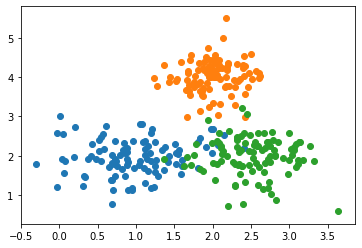

In [61]:
fig, ax = plt.subplots()
ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.scatter(x3, y3)
plt.show()

## Elbow method

Najprostsza metoda oparta na sumie odległości pomiędzy punktami w klastrze.

In [68]:
def elbow(clusters):
    result = 0
    for xs, ys in clusters:
        distance = calculate_distances(xs, ys)
        print(distance)
        result += distance / len(xs)
    return result
        
def calculate_distances(xs, ys):
    result = 0
    for x1, y1 in zip(xs, ys):
        for x2, y2 in zip(xs, ys):
            result += np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return result

In [69]:
elbow([(x1, y1), (x2, y2), (x3, y3)])

8749.243129859204
6189.000923524664
7852.568657382942


227.90812710766812

## Silhouette

Miara ta określa jak dobrze przykład pasuje do swojego klastra w porównaniu do innych klastrów. Może zawierać się w przedziale [-1, 1] (duża wartość oznacza, że obiekt pasuje dobrze do swojego klastra, a źle do pozostałych.

Gdy większość obiektów ma dużą wartość `silhouette` to klasteryzacja jest poprawna (np. wybrano dobrą liczbę klastrów).

In [75]:
def dist_to_cluster(point, cluster):
    x_i, y_i = point
    xs, ys = cluster
    distances = 0
    for x_j, y_j in zip(xs, ys):
        distances += np.sqrt((x_j - x_i)**2 + (y_j - y_i)**2)
    return distances

def a(point, cluster):
    distances = dist_to_cluster(point, cluster)
    return 1 / (len(cluster[0]) - 1) * distances

def b(point, other_clusters):
    x_i, y_i = point
    result = [1 / len(cluster[0]) * dist_to_cluster(point, cluster) for cluster in other_clusters]
    return min(result)

def silhouette(point, cluster, other_clusters):
    if len(cluster) == 1:
        return 0
    else:
        ar = a(point, cluster)
        br = b(point, other_clusters)
        return (br - ar) / max(ar, br)

results = []
clusters = {1: (x1, y1), 2: (x2, y2), 3: (x3, y3)}
for key, cluster in clusters.items():
    other_clusters = [c for k, c in clusters.items() if k != key]
    for point in zip(*cluster):
        s = silhouette(point, cluster, other_clusters)
        results.append(s)
        

print(np.mean(results))
    
    
    

0.5330937516426263
